In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import spearmanr

plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

%matplotlib inline

In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Memuat dataset STEAD
df = pd.read_csv(r'C:\Users\evano\Documents\Magang BMKG\DataSet STEAD\sample_data.csv')

In [4]:
df.shape

(571, 20)

In [5]:
df.head()

,trace_start_time,source_origin_time,receiver_latitude,receiver_longitude,receiver_elevation_m,p_arrival_sample,p_weight,p_travel_sec,s_arrival_sample,s_weight,source_latitude,source_longitude,source_depth_km,source_magnitude,source_magnitude_type,source_distance_deg,source_distance_km,back_azimuth_deg,trace_category,trace_name
0,2014-12-26 21:14:46.630000,2014-12-26 21:14:52.860000,46.850850,-121.792950,3365.0,700.0,0.79,0.77000,762.000,1.00,46.84650,-121.76083,1.10,-0.50,md,0.02247,2.50,101.20,earthquake_local,STAR.UW_20141226211445_EV
1,2015-09-07 11:33:17.099940,2015-09-07 11:33:19.767000,39.351700,-120.320500,2268.0,600.0,0.95,3.33294,836.380,0.93,39.50050,-120.31180,6.30,-0.42,ml,0.14900,16.54,2.59,earthquake_local,DON.NN_20150907113316_EV
2,2015-03-02 18:19:41.540000,2015-03-02 18:19:48.790000,46.850850,-121.792950,3365.0,800.0,1.00,0.75000,857.000,0.82,46.84633,-121.76383,1.29,-0.39,md,0.02049,2.28,102.80,earthquake_local,STAR.UW_20150302181940_EV
3,2015-08-29 21:07:32.710000,2015-08-29 21:07:35.660000,46.750599,-121.809601,853.0,500.0,0.87,2.05000,673.000,0.85,46.84900,-121.73733,2.09,-0.36,md,0.11030,12.25,26.70,earthquake_local,LON.UW_20150829210731_EV
4,2017-04-05 10:40:49.439010,2017-04-05 10:40:52.799000,36.724600,-116.975900,747.0,700.0,0.95,3.64001,932.051,0.93,36.59980,-117.07220,7.10,-0.30,ml,0.14700,16.31,211.73,earthquake_local,HEL.SN_20170405104048_EV


In [6]:
df.columns

Index(['trace_start_time', 'source_origin_time', 'receiver_latitude',
       'receiver_longitude', 'receiver_elevation_m', 'p_arrival_sample',
       'p_weight', 'p_travel_sec', 's_arrival_sample', 's_weight',
       'source_latitude', 'source_longitude', 'source_depth_km',
       'source_magnitude', 'source_magnitude_type', 'source_distance_deg',
       'source_distance_km', 'back_azimuth_deg', 'trace_category',
       'trace_name'],
      dtype='object')

In [7]:
df.describe()

,receiver_latitude,receiver_longitude,receiver_elevation_m,p_arrival_sample,p_weight,p_travel_sec,s_arrival_sample,s_weight,source_latitude,source_longitude,source_depth_km,source_magnitude,source_distance_deg,source_distance_km,back_azimuth_deg
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,34.585338,-102.806399,979.049825,672.762522,0.601594,13.493864,1702.324492,0.563117,34.528486,-100.944459,21.871349,2.628441,0.733822,81.531751,180.423185
std,18.792072,60.845852,800.977816,174.914707,0.229486,11.200863,899.055274,0.272170,18.697520,63.942124,33.839391,1.749306,0.686453,76.264814,104.504425
min,-42.415980,-177.985300,-13.000000,398.000000,0.000000,0.480000,451.000000,0.000000,-41.685600,-178.979200,-0.340000,-0.500000,0.000900,0.100000,0.600000
25%,33.316855,-122.795303,390.000000,500.000000,0.500000,3.980000,976.500000,0.500000,32.950582,-122.776751,4.760000,1.155000,0.178050,19.800000,94.250000
50%,35.935700,-116.942410,939.000000,700.000000,0.580000,10.830000,1490.000000,0.580000,35.849667,-116.921900,9.990000,2.580000,0.556100,61.850000,168.000000
75%,40.321970,-115.445745,1374.800000,800.000000,0.715000,19.485001,2162.500000,0.750000,40.422417,-115.260417,16.425000,4.005000,1.001415,111.155000,279.750000
max,69.243000,179.300000,4131.000000,1000.000000,1.000000,48.340000,4958.000000,1.000000,69.520500,179.610900,253.730000,7.900000,2.950000,327.220000,359.800000


# Data Quality
Melakukan pengecekan karakter, handling missing value, outlier, duplikat dan data imbalance serta skewness.

In [8]:
df = df[[#'network_code', 'receiver_code', 'receiver_type', 
    'receiver_latitude', 'receiver_longitude', 'receiver_elevation_m', 'p_arrival_sample',
    #   'p_status', 
        'p_weight', 'p_travel_sec', 's_arrival_sample', 
    # 's_status',
       's_weight', 
    # 'source_id', 
        'source_origin_time',
    #  'source_origin_uncertainty_sec', 
        'source_latitude', 'source_longitude',
    #  'source_error_sec', 'source_gap_deg', 'source_horizontal_uncertainty_km', 
        'source_depth_km',
    #  'source_depth_uncertainty_km', 
        'source_magnitude', 'source_magnitude_type', 
    #  'source_magnitude_author',
    #  'source_mechanism_strike_dip_rake', 'source_distance_deg',
        'source_distance_km', 
    #  'back_azimuth_deg', 'snr_db', 
    #  'coda_end_sample',
       'trace_start_time', 'trace_category', 
    #  'trace_name'
]].copy()

In [9]:
df.dtypes

receiver_latitude        float64
receiver_longitude       float64
receiver_elevation_m     float64
p_arrival_sample         float64
p_weight                 float64
p_travel_sec             float64
s_arrival_sample         float64
s_weight                 float64
source_origin_time        object
source_latitude          float64
source_longitude         float64
source_depth_km          float64
source_magnitude         float64
source_magnitude_type     object
source_distance_km       float64
trace_start_time          object
trace_category            object
dtype: object

In [10]:
df['receiver_latitude'] = pd.to_numeric(df['receiver_latitude'], errors='coerce')
df['receiver_longitude'] = pd.to_numeric(df['receiver_longitude'], errors='coerce')
df['receiver_elevation_m'] = pd.to_numeric(df['receiver_elevation_m'], errors='coerce')
df['p_arrival_sample'] = pd.to_numeric(df['p_arrival_sample'], errors='coerce')
df['p_weight'] = pd.to_numeric(df['p_weight'], errors='coerce')
df['p_travel_sec'] = pd.to_numeric(df['p_travel_sec'], errors='coerce')
df['s_arrival_sample'] = pd.to_numeric(df['s_arrival_sample'], errors='coerce')
df['s_weight'] = pd.to_numeric(df['s_weight'], errors='coerce')
df['source_latitude'] = pd.to_numeric(df['source_latitude'], errors='coerce')
df['source_longitude'] = pd.to_numeric(df['source_longitude'], errors='coerce')
df['source_depth_km'] = pd.to_numeric(df['source_depth_km'], errors='coerce')
df['source_magnitude'] = pd.to_numeric(df['source_magnitude'], errors='coerce')
df['source_distance_km'] = pd.to_numeric(df['source_distance_km'], errors='coerce')
df['source_origin_time'] = pd.to_datetime(df['source_origin_time'], errors='coerce')
df['trace_start_time'] = pd.to_datetime(df['trace_start_time'], errors='coerce')

In [11]:
# Melihat perubahan
df.dtypes

receiver_latitude               float64
receiver_longitude              float64
receiver_elevation_m            float64
p_arrival_sample                float64
p_weight                        float64
p_travel_sec                    float64
s_arrival_sample                float64
s_weight                        float64
source_origin_time       datetime64[ns]
source_latitude                 float64
source_longitude                float64
source_depth_km                 float64
source_magnitude                float64
source_magnitude_type            object
source_distance_km              float64
trace_start_time         datetime64[ns]
trace_category                   object
dtype: object

In [12]:
# Pelabelan data categorical
df['trace_category'] = df['trace_category'].replace({1: 'Noise',
                                                         0: 'Earthquake_local'})
df['source_magnitude_type'] = df['source_magnitude_type'].replace({0: 'ml',
                                                                   1: 'md',
                                                                   2: 'mb',
                                                                   3: 'etc'})

In [13]:
'''TODO: Memisahkan data numerical dengan categorical'''
# Pisahkan numerical dan categorical
numerical_col = df.select_dtypes(exclude=['object', 'datetime64[ns]'])
categorical_col = df.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

In [14]:
# Pengecekan karakter dari data kategorikal
for i in categorical_col:
    print("Berikut ini merupakan informasi: {} dengan {}".format(i, df[i].unique()))
    print()

Berikut ini merupakan informasi: source_magnitude_type dengan ['md' 'ml' 'mb' 'mb_lg' 'mw' 'ms']

Berikut ini merupakan informasi: trace_category dengan ['earthquake_local']



** NOTES **
Feature 'source_magnitude_type' mengalami kesalahan penulisan:

1. Nilai "nan" seharusnya bukan string, tetapi biasanya digunakan untuk mewakili "Not a Number" atau data yang hilang. Ini biasanya direpresentasikan sebagai NaN (Not-a-Number) dalam tipe data numerik.
2. Nilai "none" dan "h" seharusnya tidak case-sensitive dan seharusnya digunakan sebagai "None" dan "H" jika Anda ingin memisahkan nilai yang berbeda berdasarkan case (huruf besar dan huruf kecil).
3. Semua nilai dalam daftar tersebut sebaiknya dikelompokkan berdasarkan case yang sama (misalnya, semuanya dalam huruf kecil atau huruf besar) untuk menghindari ambiguitas dalam pemrosesan data.

In [15]:
'''TODO: Menampilkan jumlah data per item'''
# Melihat jumlah nilai unik dari kolom 'source_magnitude'
df['source_magnitude'].value_counts()

-0.50    1
 3.56    1
 3.50    1
 3.51    1
 3.52    1
        ..
 1.57    1
 1.56    1
 1.55    1
 1.54    1
 7.90    1
Name: source_magnitude, Length: 571, dtype: int64

In [16]:
# Menemukan baris dengan kolom 'source_magnitude' bernilai '0'
df[df['source_magnitude']==0]

,receiver_latitude,receiver_longitude,receiver_elevation_m,p_arrival_sample,p_weight,p_travel_sec,s_arrival_sample,s_weight,source_origin_time,source_latitude,source_longitude,source_depth_km,source_magnitude,source_magnitude_type,source_distance_km,trace_start_time,trace_category
27,33.598182,-116.596005,1374.8,600.0,0.67,2.32,769.0,0.59,2015-09-21 05:42:28.850,33.58733,-116.60633,13.26,0.0,ml,1.54,2015-09-21 05:42:25.170,earthquake_local


In [17]:
# Ganti kolom 'source_magnitude' yang bernilai '0' menjadi NaN
df.loc[df['source_magnitude']==0, 'source_magnitude'] = np.nan

In [18]:
# Cek kembali apakah masih ada data kolom 'source_magnitude' yang bernilai '0'
df['source_magnitude'].value_counts()

-0.50    1
 3.56    1
 3.50    1
 3.51    1
 3.52    1
        ..
 1.58    1
 1.57    1
 1.56    1
 1.55    1
 7.90    1
Name: source_magnitude, Length: 570, dtype: int64

In [19]:
# Check missing values
print("Hasil missing value:\n", df.isnull().sum())

Hasil missing value:
 receiver_latitude        0
receiver_longitude       0
receiver_elevation_m     0
p_arrival_sample         0
p_weight                 0
p_travel_sec             0
s_arrival_sample         0
s_weight                 0
source_origin_time       0
source_latitude          0
source_longitude         0
source_depth_km          0
source_magnitude         1
source_magnitude_type    0
source_distance_km       0
trace_start_time         0
trace_category           0
dtype: int64


In [20]:
'''TODO: Mengisi dengan modus'''
# Fillna pada kolom 'p_arrival_sample' dengan modus
modus_p_arrival_sample = df['p_arrival_sample'].mode()[0]
df['p_arrival_sample'] = df['p_arrival_sample'].fillna(modus_p_arrival_sample)

# Fillna pada kolom 'p_weight' dengan modus
modus_p_weight = df['p_weight'].mode()[0]
df['p_weight'] = df['p_weight'].fillna(modus_p_weight)

# Fillna pada kolom 'p_travel_sec' dengan modus
modus_p_travel_sec = df['p_travel_sec'].mode()[0]
df['p_travel_sec'] = df['p_travel_sec'].fillna(modus_p_travel_sec)

# Fillna pada kolom 's_arrival_sample' dengan modus
modus_s_arrival_sample = df['s_arrival_sample'].mode()[0]
df['s_arrival_sample'] = df['s_arrival_sample'].fillna(modus_s_arrival_sample)

# Fillna pada kolom 's_weight' dengan modus
modus_s_weight = df['s_weight'].mode()[0]
df['s_weight'] = df['s_weight'].fillna(modus_s_weight)

# Fillna pada kolom 'source_origin_time' dengan modus
modus_source_origin_time = df['source_origin_time'].mode()[0]
df['source_origin_time'] = df['source_origin_time'].fillna(modus_source_origin_time)

# Fillna pada kolom 'source_latitude' dengan modus
modus_source_latitude = df['source_latitude'].mode()[0]
df['source_latitude'] = df['source_latitude'].fillna(modus_source_latitude)

# Fillna pada kolom 'source_longitude' dengan modus
modus_source_longitude = df['source_longitude'].mode()[0]
df['source_longitude'] = df['source_longitude'].fillna(modus_source_longitude)

# Fillna pada kolom 'source_depth_km' dengan modus
modus_source_depth_km = df['source_depth_km'].mode()[0]
df['source_depth_km'] = df['source_depth_km'].fillna(modus_source_depth_km)

# Fillna pada kolom 'source_magnitude' dengan modus
modus_source_magnitude = df['source_magnitude'].mode()[0]
df['source_magnitude'] = df['source_magnitude'].fillna(modus_source_magnitude)

# Fillna pada kolom 'source_magnitude_type' dengan modus
modus_source_magnitude_type = df['source_magnitude_type'].mode()[0]
df['source_magnitude_type'] = df['source_magnitude_type'].fillna(modus_source_magnitude_type)

# Fillna pada kolom 'source_distance_km' dengan modus
modus_source_distance_km = df['source_distance_km'].mode()[0]
df['source_distance_km'] = df['source_distance_km'].fillna(modus_source_distance_km)

In [21]:
'''TODO: Menampilkan missing value'''
# Check missing values kembali
print("Hasil missing value:\n", df.isnull().sum())

Hasil missing value:
 receiver_latitude        0
receiver_longitude       0
receiver_elevation_m     0
p_arrival_sample         0
p_weight                 0
p_travel_sec             0
s_arrival_sample         0
s_weight                 0
source_origin_time       0
source_latitude          0
source_longitude         0
source_depth_km          0
source_magnitude         0
source_magnitude_type    0
source_distance_km       0
trace_start_time         0
trace_category           0
dtype: int64


In [22]:
'''TODO: Menampilkan data duplikat ada berapa'''
# Memeriksa duplikat data
df.duplicated().sum()

0

In [23]:
# Menampilkan baris data duplicate
df[df.duplicated()]

,receiver_latitude,receiver_longitude,receiver_elevation_m,p_arrival_sample,p_weight,p_travel_sec,s_arrival_sample,s_weight,source_origin_time,source_latitude,source_longitude,source_depth_km,source_magnitude,source_magnitude_type,source_distance_km,trace_start_time,trace_category


In [24]:
'''TODO: Menghapus data duplikat dan mempertahankan data pertama'''
# Menghapus data duplikat
df.drop_duplicates(keep='first',inplace=True)

# Memeriksa ulang duplikat data
df.duplicated().sum()

0

In [25]:
df.shape

(571, 17)

# Section 3
Selanjutnya kita akan menampilkan outliers dan menghapus data yang outlier.

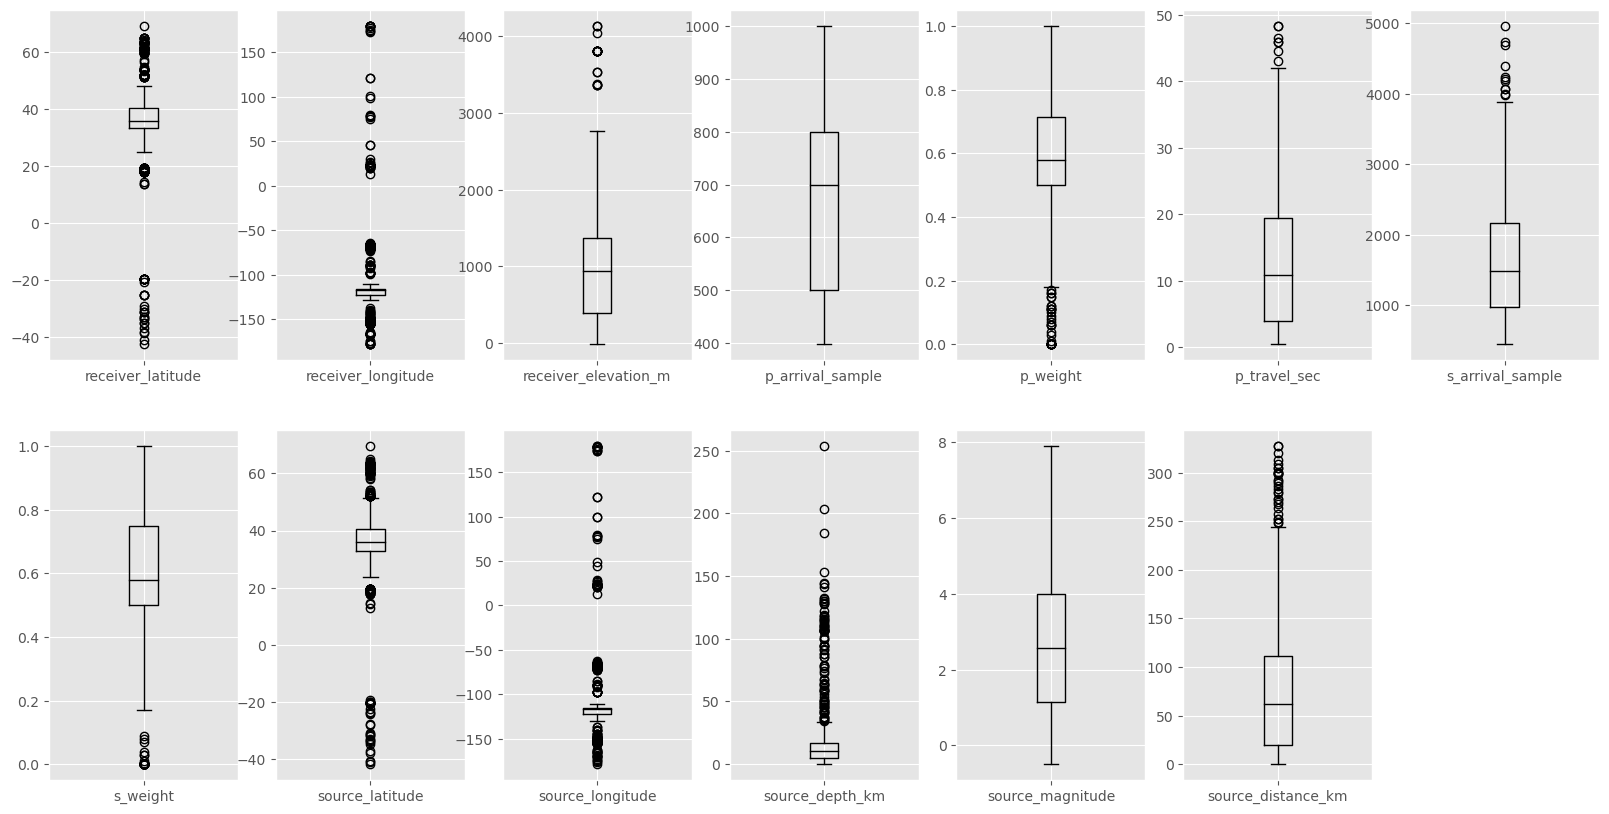

In [26]:
#Menampilkan boxplot untuk melihat outliers data numerik
df.plot(kind = 'box', subplots = True, layout = (2,7), sharex = False, sharey = False, figsize = (20, 10), color = 'k')
plt.show()

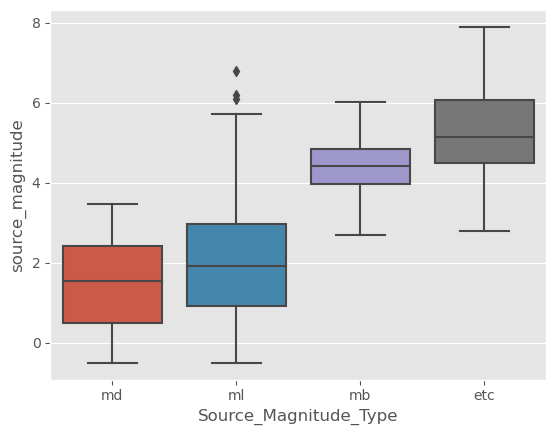

In [27]:
'''TODO: Menampilkan boxplot source_magnitude per target'''
# Mengelompokkan data 'source_magnitude_type' menjadi 'ml', 'md', dan 'etc'
df['Source_Magnitude_Type'] = df['source_magnitude_type'].apply(lambda x: x if x in ['ml', 'mb', 'md'] else 'etc')

# Menampilkan boxplot berdasarkan kelompok
sns.boxplot(x=df['Source_Magnitude_Type'], y=df['source_magnitude'], data=df)
plt.show()

In [28]:
'''TODO: Menentukan data continous'''
#Mencari tahu data yang outliers dengan mendefinisikan fungsi
continous_features = ['receiver_latitude', 'receiver_longitude', 'receiver_elevation_m', 'p_arrival_sample', 'p_weight', 'p_travel_sec', 's_arrival_sample', 's_weight', 'source_latitude', 'source_longitude', 'source_depth_km', 'source_magnitude', 'source_distance_km']
def outliers(df_out, drop=False):
    for each_feature in df_out.columns:
        if each_feature in continous_features:  # Memeriksa apakah kolom adalah data kontinu
            feature_df = df_out[each_feature]
            Q1 = np.percentile(feature_df, 25.)
            Q3 = np.percentile(feature_df, 75.)
            IQR = Q3 - Q1
            outlier_step = IQR * 1.5
            outliers = feature_df[~((feature_df >= Q1 - outlier_step) & (feature_df <= Q3 + outlier_step))].index.tolist()
            if not drop:
                print('For the feature {}, Num of Outliers is {}'.format(each_feature, len(outliers)))
            if drop:
                df_out.drop(outliers, inplace=True, errors='ignore')
                print('Outliers from {} feature removed'.format(each_feature))
'''TODO: Menampilkan data yang outlier'''
outliers(df)

For the feature receiver_latitude, Num of Outliers is 174
For the feature receiver_longitude, Num of Outliers is 231
For the feature receiver_elevation_m, Num of Outliers is 20
For the feature p_arrival_sample, Num of Outliers is 0
For the feature p_weight, Num of Outliers is 36
For the feature p_travel_sec, Num of Outliers is 7
For the feature s_arrival_sample, Num of Outliers is 11
For the feature s_weight, Num of Outliers is 82
For the feature source_latitude, Num of Outliers is 168
For the feature source_longitude, Num of Outliers is 231
For the feature source_depth_km, Num of Outliers is 92
For the feature source_magnitude, Num of Outliers is 0
For the feature source_distance_km, Num of Outliers is 29


In [29]:
'''TODO: Menghapus data yang outlier'''
# Menghapus outlier dengan fungsi sebelumnya
outliers(df,drop=True)

Outliers from receiver_latitude feature removed
Outliers from receiver_longitude feature removed
Outliers from receiver_elevation_m feature removed
Outliers from p_arrival_sample feature removed
Outliers from p_weight feature removed
Outliers from p_travel_sec feature removed
Outliers from s_arrival_sample feature removed
Outliers from s_weight feature removed
Outliers from source_latitude feature removed
Outliers from source_longitude feature removed
Outliers from source_depth_km feature removed
Outliers from source_magnitude feature removed
Outliers from source_distance_km feature removed


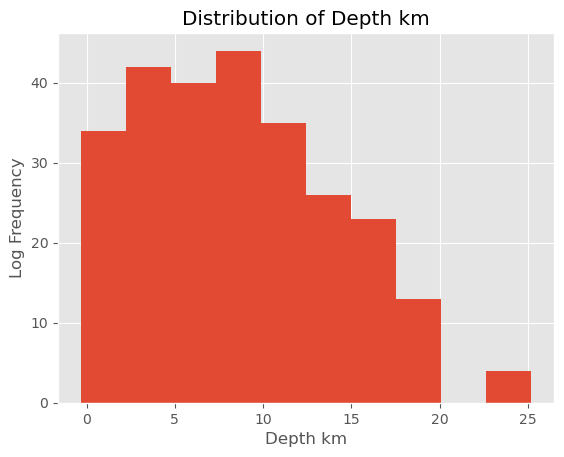

In [30]:
'''TODO: Buatlah histogram source_depth_km'''
# Jumlah kategori trace_category pada dataset
df['source_depth_km'].hist().plot(kind='bar')
#data['source_depth_km  '].value_counts().plot(kind='bar')
plt.title('Distribution of Depth km')
plt.xlabel('Depth km')
plt.ylabel('Log Frequency')
plt.show()

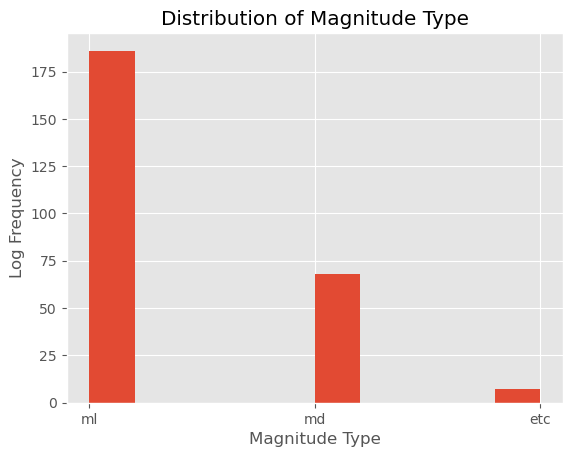

In [31]:
'''TODO: Buatlah histogram source_depth_km'''
# Mengganti nilai selain "ml" dan "md" menjadi "etc" dalam kolom source_magnitude_type
df['source_magnitude_type'] = df['source_magnitude_type'].apply(lambda x: x if x in ['ml', 'md'] else 'etc')
# Membuat histogram dari kolom yang telah diubah
df['source_magnitude_type'].hist()
plt.title('Distribution of Magnitude Type')
plt.xlabel('Magnitude Type')
plt.ylabel('Log Frequency')
plt.show()

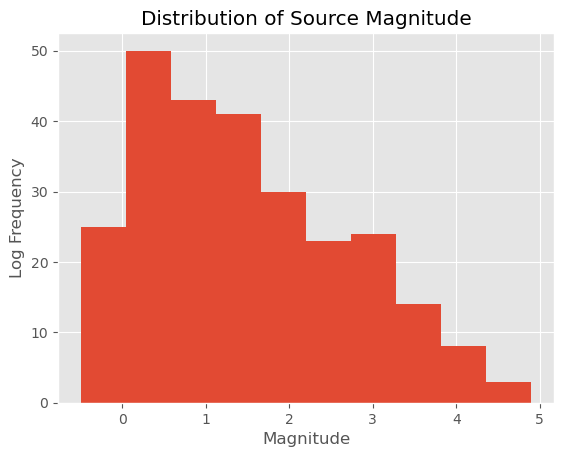

In [32]:
'''TODO: Buatlah histogram source_magnitude'''
# Jumlah kategori source_magnitude pada dataset
df['source_magnitude'].hist().plot(kind='bar')
#data['source_magnitude '].value_counts().plot(kind='bar')
plt.title('Distribution of Source Magnitude')
plt.xlabel('Magnitude')
plt.ylabel('Log Frequency')
plt.show()

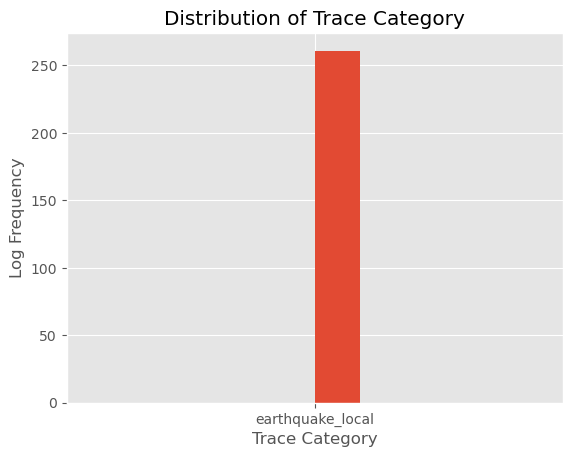

In [33]:
'''TODO: Buatlah histogram trace_category'''
# Jumlah kategori trace_category pada dataset
df['trace_category'].hist().plot(kind='bar')
#data['trace_category'].value_counts().plot(kind='bar')
plt.title('Distribution of Trace Category')
plt.xlabel('Trace Category')
plt.ylabel('Log Frequency')
plt.show()

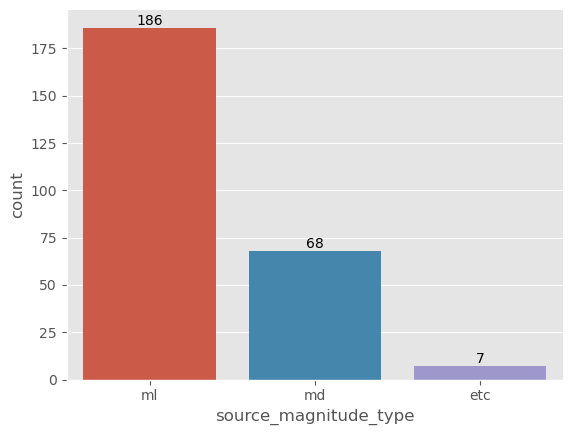

In [34]:
# Memeriksa data imbalance
ax = sns.countplot(x=df['source_magnitude_type'],data=df)
for label in ax.containers:
    ax.bar_label(label)
sns.despine()
plt.show()

In [35]:
# Melihat statistik deskriptif dari data
df.describe()

,receiver_latitude,receiver_longitude,receiver_elevation_m,p_arrival_sample,p_weight,p_travel_sec,s_arrival_sample,s_weight,source_latitude,source_longitude,source_depth_km,source_magnitude,source_distance_km
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,36.067911,-118.363358,1115.157471,657.927203,0.705939,7.340901,1196.976736,0.690575,36.029688,-118.358631,8.662146,1.479349,41.510421
std,3.512889,2.651524,564.704976,170.899291,0.191008,5.437209,446.343450,0.156653,3.526008,2.727314,5.510673,1.219935,33.916999
min,31.037600,-124.284300,-8.000000,398.000000,0.060000,0.480000,451.000000,0.330000,31.223500,-125.859833,-0.340000,-0.500000,0.100000
25%,33.598182,-120.400916,939.000000,500.000000,0.590000,2.890000,873.000000,0.560000,33.486667,-120.529830,4.100000,0.460000,11.540000
50%,34.171410,-116.959600,1218.600000,695.000000,0.640000,6.120000,1111.000000,0.610000,34.215330,-117.096000,8.190000,1.260000,33.950000
75%,38.504299,-116.596005,1392.000000,800.000000,0.930000,10.960000,1462.000000,0.850000,38.478900,-116.472000,12.700000,2.310000,65.260000
max,46.303300,-110.835830,2646.000000,1000.000000,1.000000,25.190001,2697.571000,1.000000,46.369830,-111.021670,25.200000,4.900000,137.970000


Statistik deskriptif ini menggambarkan karakteristik kolom-kolom berikut dalam kumpulan data:

1. receiver_latitude: Rata-rata lintang (latitude) penerima adalah sekitar 36.35 dengan rentang dari sekitar 31.38 hingga 46.56 derajat. Ini menggambarkan posisi geografis penerima dalam derajat lintang.
2. receiver_longitude: Rata-rata bujur (longitude) penerima adalah sekitar -118.82 dengan rentang dari sekitar -124.27 hingga -109.09 derajat. Ini menggambarkan posisi geografis penerima dalam derajat bujur.
3. receiver_elevation_m: Rata-rata ketinggian penerima adalah sekitar 1168.16 meter dengan rentang dari sekitar 149 hingga 2256 meter. Ini menggambarkan ketinggian penerima di atas permukaan laut.
4. p_arrival_sample: Rata-rata sampel kedatangan P (p_arrival) adalah sekitar 684.10 dengan rentang dari sekitar 21 hingga 1461. Ini berkaitan dengan data seismik.
5. p_weight: Rata-rata bobot P (p_weight) adalah sekitar 0.80 dengan rentang dari sekitar 0.46 hingga 1.00. Bobot ini dapat digunakan dalam analisis seismik.
6. p_travel_sec: Rata-rata waktu tempuh P (p_travel_sec) adalah sekitar 4.56 dengan rentang dari sekitar 0 hingga 16.62 detik. Ini mengukur waktu tempuh kedatangan gelombang P dalam seismologi.
7. s_arrival_sample: Rata-rata sampel kedatangan S (s_arrival_sample) adalah sekitar 1018.56 dengan rentang dari sekitar 374 hingga 1740.61. Ini berkaitan dengan data seismik.
8. s_weight: Rata-rata bobot S (s_weight) adalah sekitar 0.76 dengan rentang dari sekitar 0.44 hingga 1.00. Bobot ini dapat digunakan dalam analisis seismik.
9. source_latitude: Rata-rata lintang (latitude) sumber adalah sekitar 35.64 dengan rentang dari sekitar 31.41 hingga 46.04 derajat. Ini menggambarkan posisi geografis sumber dalam derajat lintang.
10. source_longitude: Rata-rata bujur (longitude) sumber adalah sekitar -118.23 dengan rentang dari sekitar -124.03 hingga -112.30 derajat. Ini menggambarkan posisi geografis sumber dalam derajat bujur.
11. source_depth_km: Rata-rata kedalaman sumber adalah sekitar 6.31 kilometer dengan rentang dari sekitar -3.44 hingga 23.29 kilometer. Ini menggambarkan kedalaman sumber gempa bumi.
12. source_magnitude: Rata-rata magnitudo sumber adalah sekitar 0.96 dengan rentang dari sekitar -0.20 hingga 2.05. Ini mengukur besarnya gempa bumi yang dihasilkan oleh sumber.
13. source_distance_km: Rata-rata jarak antara penerima dan sumber adalah sekitar 24.77 kilometer dengan rentang dari sekitar 0.02 hingga 94.03 kilometer. Ini menggambarkan jarak antara penerima dan sumber gempa.

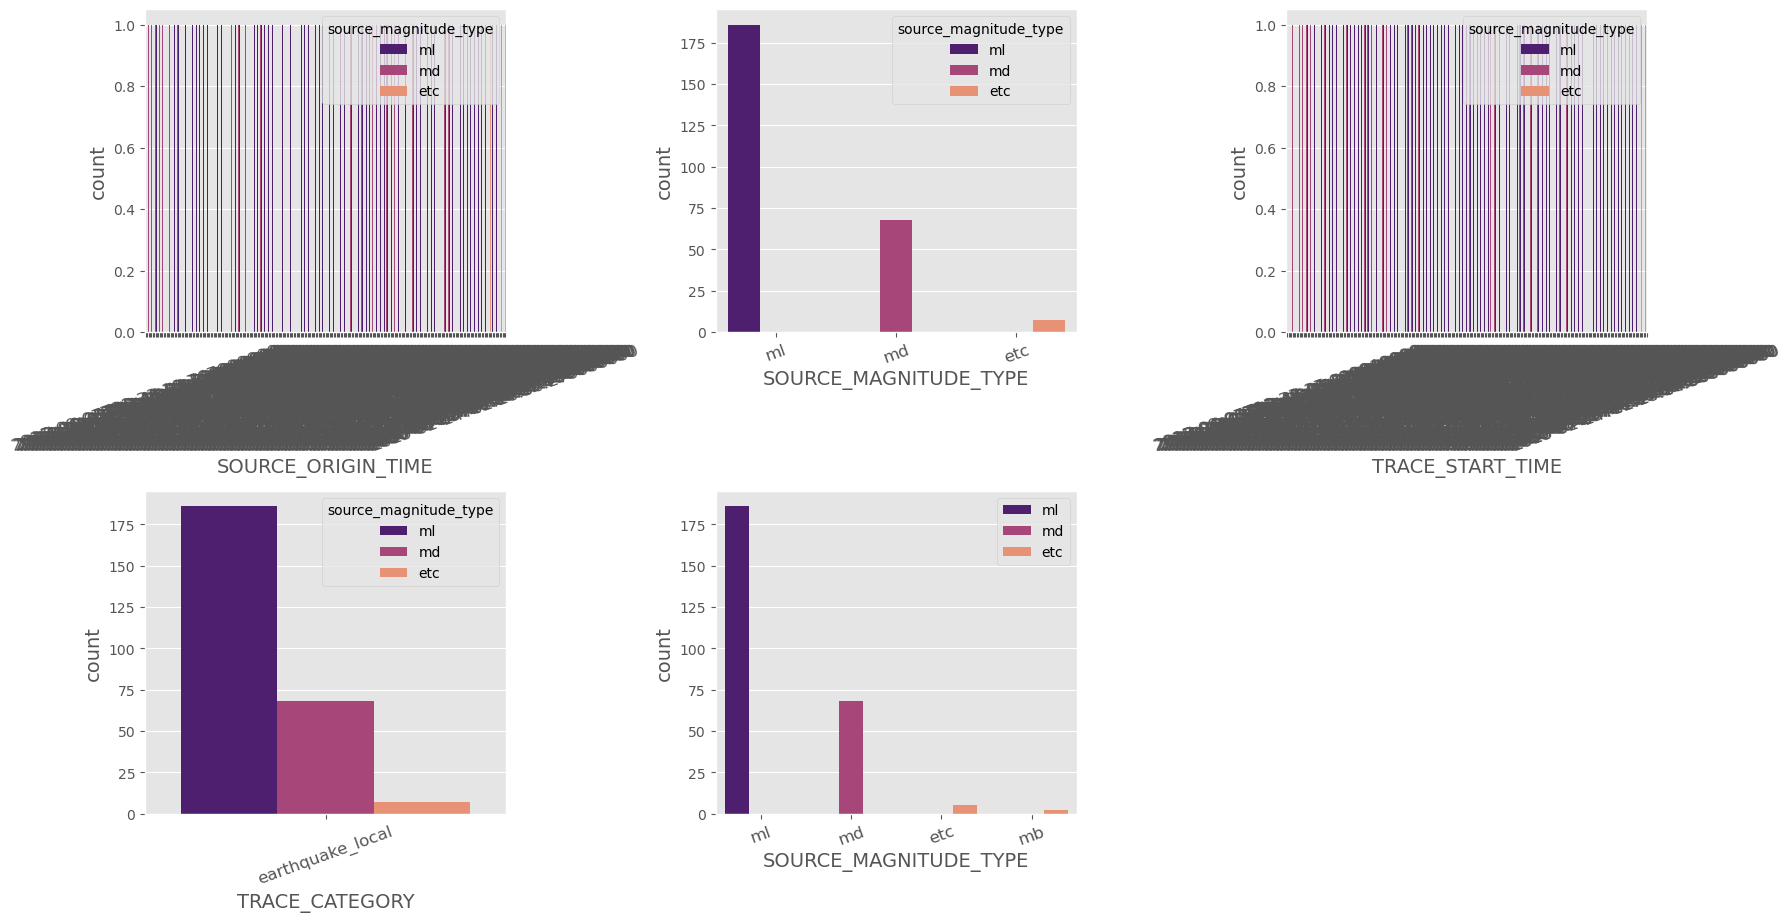

In [37]:
# Memvisualisasikan distribusi variabel kategorikal
categorical_col = df.select_dtypes(exclude=['int64','float64']) # reload categorical data
plt.figure(figsize=(18, 18))  # Increase the figure size
for index, column in enumerate(categorical_col):
    ax = plt.subplot(4, 3, index + 1)
    sns.countplot(data=categorical_col, x=column, hue='source_magnitude_type', palette='magma')
    ax.set_xlabel(column.upper(), fontsize=14)
    ax.set_ylabel("count", fontsize=14)
    ax.tick_params(axis='x', labelrotation=20, labelsize=12)  # Rotate and set fontsize for x-axis labels

plt.tight_layout(pad=1.0)
plt.legend()
plt.subplots_adjust(bottom=0.01)  # Fine-tune the spacing
plt.show()

In [38]:
# Simpan data yang sudah ada label
df.to_csv('data.csv')

# Melabeli kembali datanya
df['trace_category'] = df['trace_category'].replace({1: 'Noise', 0: 'Earthquake_local'})
df['source_magnitude_type'] = df['source_magnitude_type'].replace({0: 'ml', 1: 'md', 2: 'mb', 3: 'etc'})

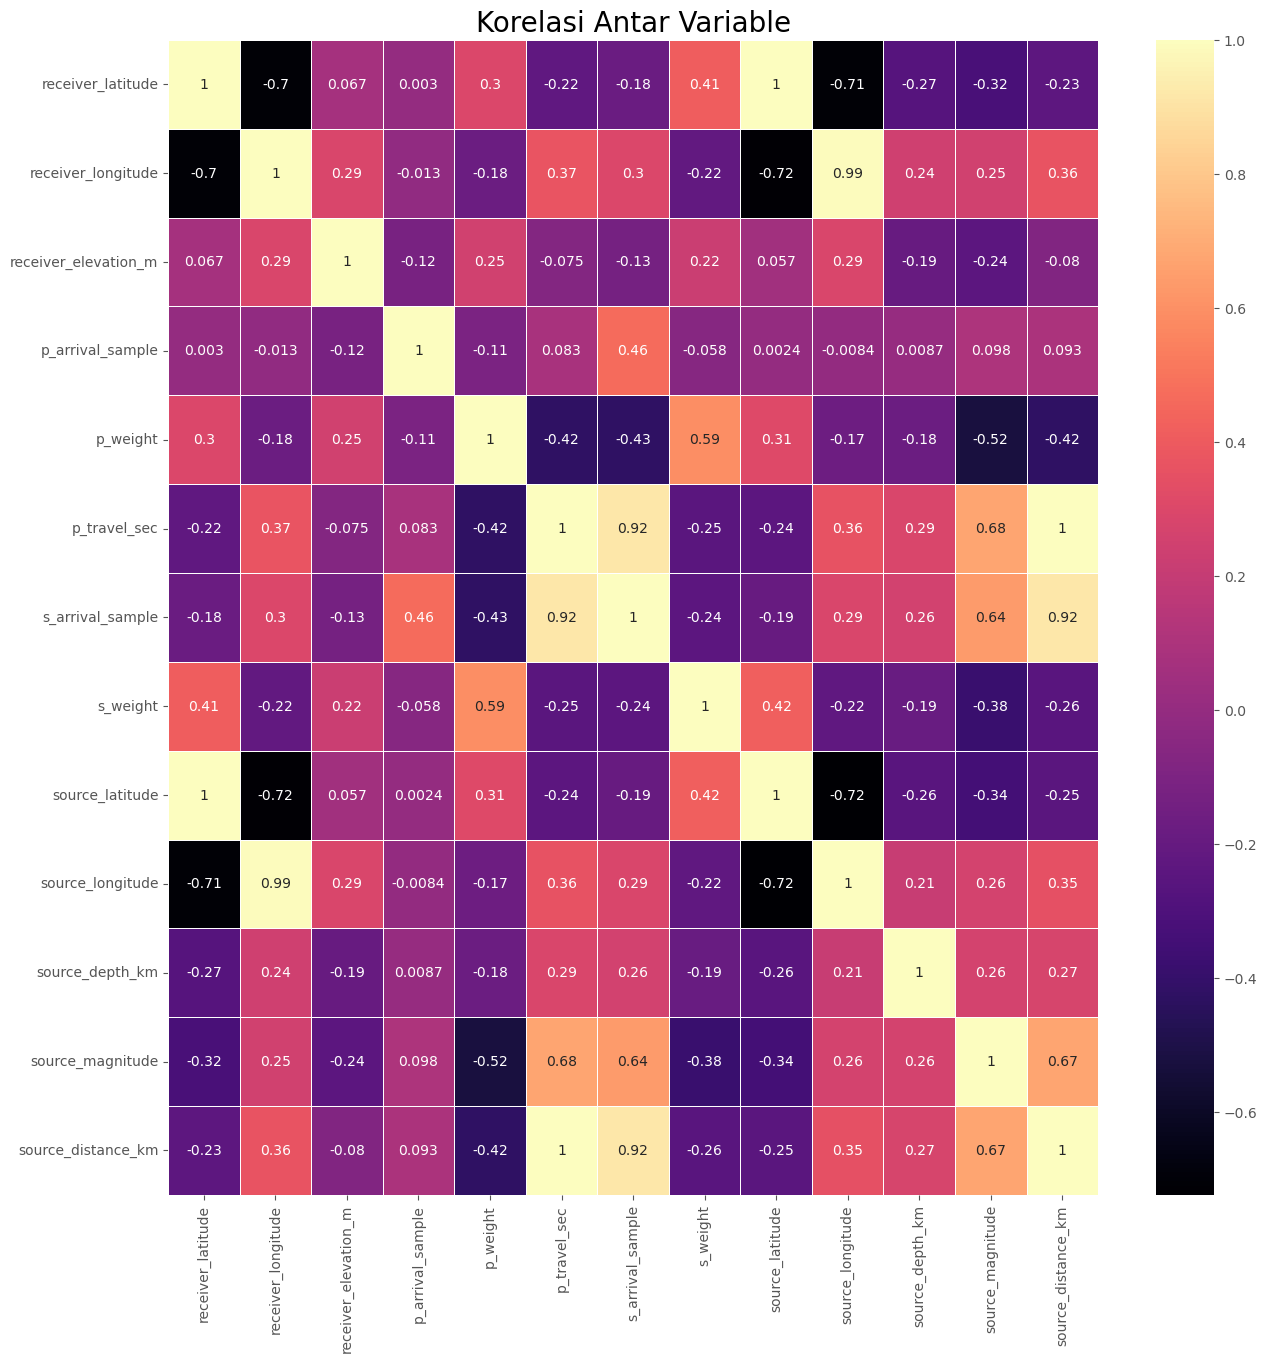

In [39]:
'''TODO: Menampilkan grafik korelasi'''
# melihat korelasi antar variable untuk mencari feature yang penting
plt.figure(figsize=(15,15))
cor = df.corr()
sns.heatmap(cor,annot=True, linewidth=.4, cmap="magma")
plt.title('Korelasi Antar Variable', fontsize = 20)
plt.show()

In [40]:
'''TODO: Menampilkan tabel korelasi'''
cor_matrix = df.corr()
cor_matrix

,receiver_latitude,receiver_longitude,receiver_elevation_m,p_arrival_sample,p_weight,p_travel_sec,s_arrival_sample,s_weight,source_latitude,source_longitude,source_depth_km,source_magnitude,source_distance_km
receiver_latitude,1.000000,-0.704791,0.066711,0.002991,0.296690,-0.224272,-0.178627,0.408814,0.995263,-0.708686,-0.267108,-0.324993,-0.234302
receiver_longitude,-0.704791,1.000000,0.292411,-0.013248,-0.175047,0.369313,0.298392,-0.216991,-0.716504,0.988446,0.239515,0.248339,0.364961
receiver_elevation_m,0.066711,0.292411,1.000000,-0.119572,0.246607,-0.074908,-0.133709,0.219343,0.056933,0.287008,-0.194265,-0.242183,-0.079806
p_arrival_sample,0.002991,-0.013248,-0.119572,1.000000,-0.109629,0.083060,0.464897,-0.057535,0.002417,-0.008396,0.008697,0.098454,0.093220
p_weight,0.296690,-0.175047,0.246607,-0.109629,1.000000,-0.422400,-0.425694,0.591553,0.307189,-0.167172,-0.177451,-0.522535,-0.424238
p_travel_sec,-0.224272,0.369313,-0.074908,0.083060,-0.422400,1.000000,0.916485,-0.251333,-0.241008,0.355499,0.287901,0.676785,0.995225
s_arrival_sample,-0.178627,0.298392,-0.133709,0.464897,-0.425694,0.916485,1.000000,-0.243470,-0.193482,0.287994,0.256855,0.642952,0.918066
s_weight,0.408814,-0.216991,0.219343,-0.057535,0.591553,-0.251333,-0.243470,1.000000,0.417335,-0.224166,-0.187898,-0.380958,-0.258640
source_latitude,0.995263,-0.716504,0.056933,0.002417,0.307189,-0.241008,-0.193482,0.417335,1.000000,-0.723809,-0.257192,-0.342540,-0.250135
source_longitude,-0.708686,0.988446,0.287008,-0.008396,-0.167172,0.355499,0.287994,-0.224166,-0.723809,1.000000,0.207455,0.262457,0.351522


In [41]:
# Mengurutkan korelasi
sorted_correlation = cor_matrix['receiver_latitude'].sort_values(ascending=False)
sorted_correlation

receiver_latitude       1.000000
source_latitude         0.995263
s_weight                0.408814
p_weight                0.296690
receiver_elevation_m    0.066711
p_arrival_sample        0.002991
s_arrival_sample       -0.178627
p_travel_sec           -0.224272
source_distance_km     -0.234302
source_depth_km        -0.267108
source_magnitude       -0.324993
receiver_longitude     -0.704791
source_longitude       -0.708686
Name: receiver_latitude, dtype: float64

<AxesSubplot:>

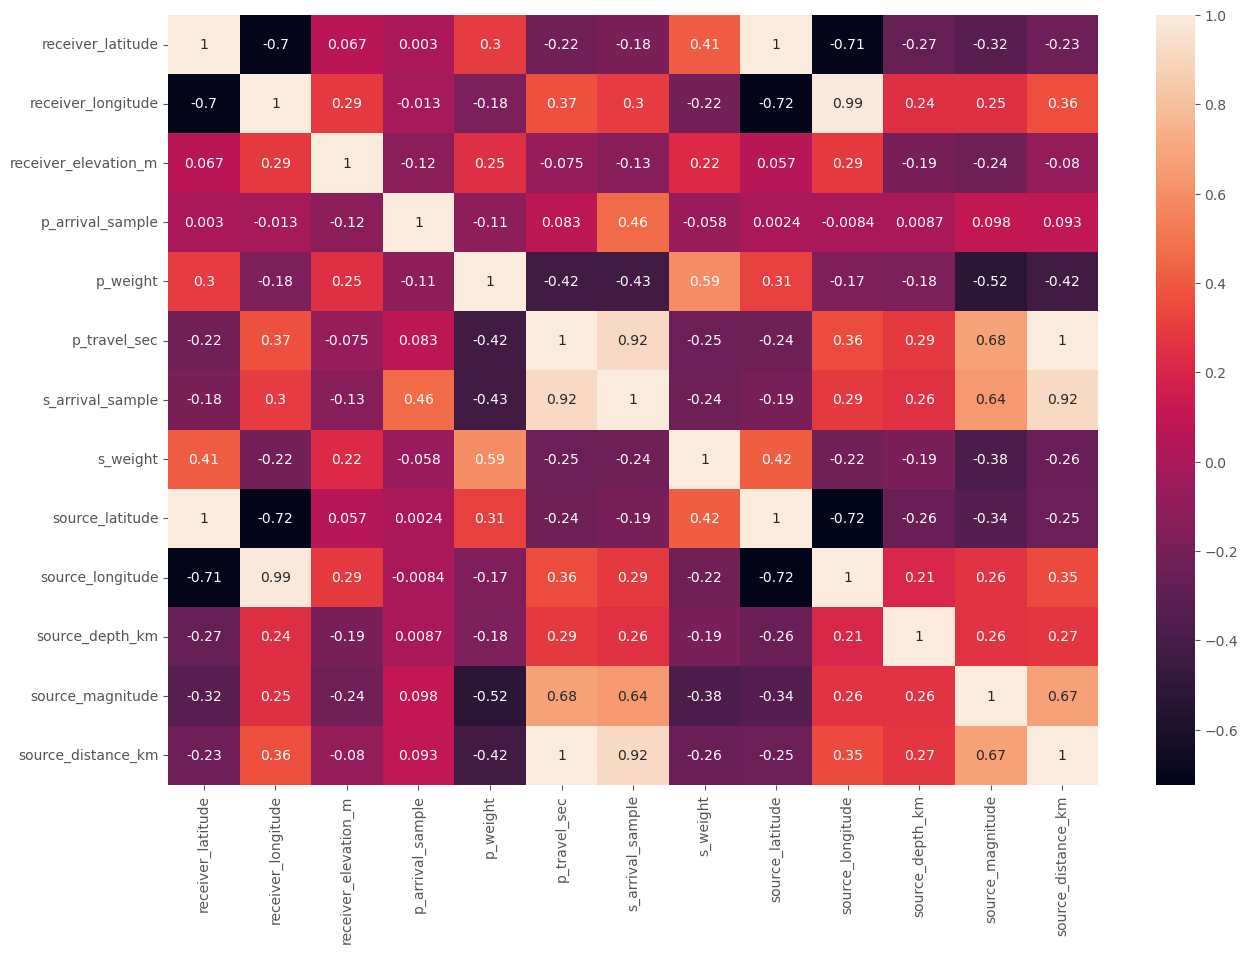

In [42]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

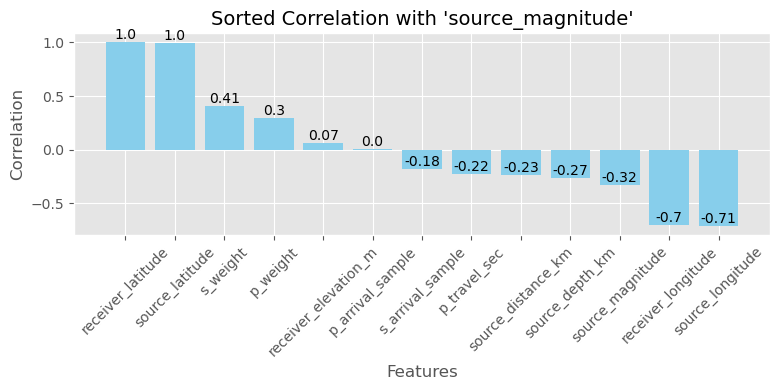

In [43]:
plt.figure(figsize=(8, 4))  # Set the figure size
plt.bar(sorted_correlation.index, sorted_correlation, color='skyblue')
plt.xlabel("Features", fontsize=12)
plt.ylabel("Correlation", fontsize=12)
plt.title("Sorted Correlation with 'source_magnitude'", fontsize=14)

# Add text labels to the bars
for i, val in enumerate(sorted_correlation):
    plt.text(i, val, round(val, 2), ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45, fontsize=10)  # Rotate and set fontsize for x-axis labels
plt.tight_layout()